In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn

In [12]:
rc_update = {'font.size': 18, 'font.family': 'serif',
				 'font.serif': ['Times New Roman', 'FreeSerif'], 'mathtext.fontset': 'cm'}
plt.rcParams.update(rc_update)

colors = {'orange': '#ffab40', 'Lgrey': '#999', 'blue': '#7ea8a7', 'red': '#e58e8fff', 'yellow': '#fcf3ccff'}

def despine(left=False, right=False, labelleft=False, labelbottom=False, bottom=False):
    seaborn.despine(ax=ax, offset=0)
    plt.tick_params(left=left, right=right, labelleft=labelleft, 
                labelbottom=labelbottom, bottom=bottom)

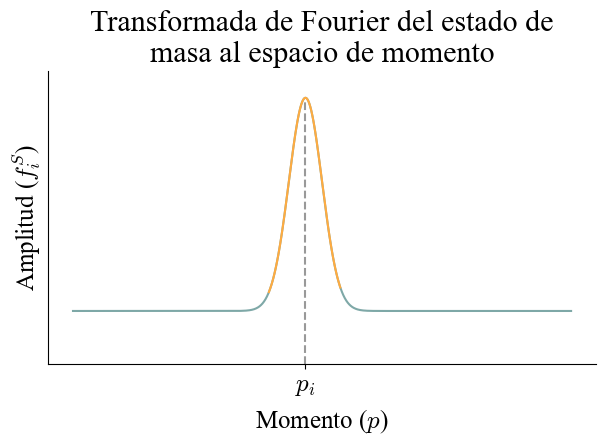

In [10]:
pi = 120
p = np.linspace(50, 200, 1000)
pa = np.linspace(109, 130.5, 1000)
sigma = 5
f = lambda p: stats.norm.pdf(p, pi, sigma)

fig, ax = plt.subplots()
ax.plot(p, f(p), color=colors['blue'])
ax.plot(pa, f(pa), color=colors['orange'])
ax.axvline(pi, 0, 0.9, color=colors['Lgrey'], linestyle='--')
ax.set(title="Transformada de Fourier del estado de\nmasa al espacio de momento",
       xlabel='Momento ($p$)', ylabel='Amplitud ($f_i^S$)', ylim=(-0.02, 0.09))

ax.xaxis.labelpad = 7
ax.set_xticks([pi,])
ax.set_xticklabels(['$p_i$'])
despine(labelbottom=True, bottom=True)
plt.tight_layout()
# Exporto como .png pero InkScape recupera su vectorness al exportar como .pdf ahí
plt.savefig("./fig/Fourier-momento.png", dpi=300)

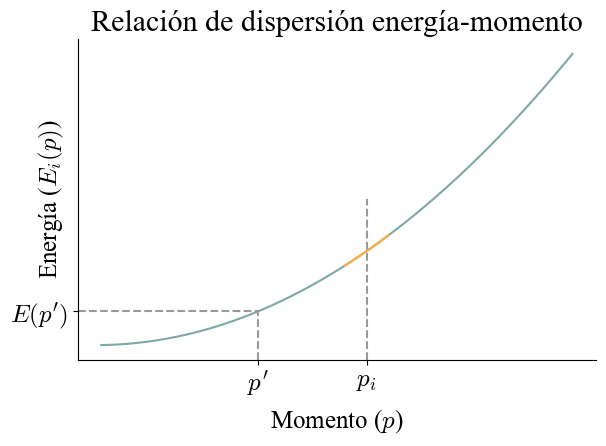

In [6]:
pi = 2500
pa = 1500
mi = 1E8
p = np.linspace(50, 4400, 1000)
approx_p = np.linspace(2300, 2700, 1000)
E = lambda p: np.sqrt(p**2 + mi**2)

fig, ax = plt.subplots()
ax.plot(p, E(p), color=colors['blue'])
ax.plot(approx_p, E(approx_p), color=colors['orange'])
ax.axvline(pi, 0, 0.5, color=colors['Lgrey'], linestyle='--')
ax.axvline(pa, 0, 0.15, color=colors['Lgrey'], linestyle='--')
ax.axhline(E(pa), 0, 0.35, color=colors['Lgrey'], linestyle='--')
ax.set(title="Relación de dispersión energía-momento",
       xlabel='Momento ($p$)', ylabel='Energía ($E_i(p)$)')
       #ylim=(-0.02, 0.09))

ax.xaxis.labelpad = 7
ax.yaxis.labelpad = -40
ax.set_xticks([pa, pi,])
ax.set_xticklabels(["$p'$", '$p_i$'])
ax.set_yticks([E(pa)])
ax.set_yticklabels(["$E(p')$"])
despine(labelleft=True, left=True,
        labelbottom=True, bottom=True)

plt.tight_layout()
plt.savefig("./fig/dispersion-relation.png", dpi=500)

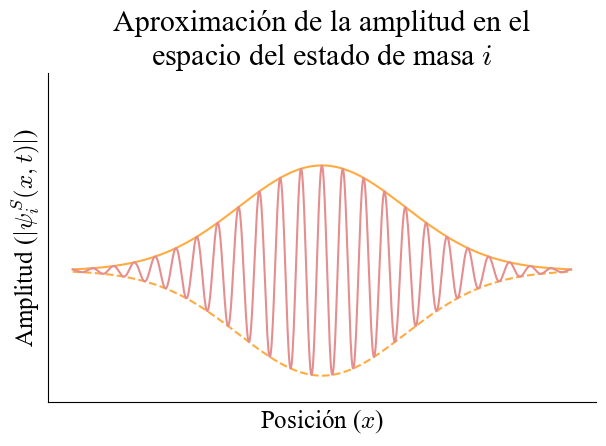

In [22]:
pi = 1
sigma = 25
x = np.linspace(-3 * sigma, 3 * sigma, 1000)
envelope = lambda x: stats.norm.pdf(x, 0, sigma)
carrier = lambda x: np.cos(pi * x)
fig, ax = plt.subplots()
ax.plot(x, envelope(x), color=colors['orange'])
ax.plot(x, -envelope(x), color=colors['orange'], linestyle='--')
ax.plot(x, envelope(x) * carrier(x), color=colors['red'])
ax.set(title="Aproximación de la amplitud en el\nespacio del estado de masa $i$",
       xlabel='Posición ($x$)', ylabel='Amplitud ($|\psi_i^S(x, t)|$)', ylim=(-0.02, 0.03))

despine()
plt.tight_layout()
plt.savefig("./fig/carrier-envelope.png", dpi=500)